# Data 620 - Week 6 Assignment
## Team 1  -  Jason Givens-Doyle, Mehdi Khan, Paul Britton



Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

Brief Description: http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis.   [For more background information, see also:http://rpackages.ianhowson.com/cran/latentnet/man/davis.html].  Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
Dataset: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat
Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html
What can you infer about the relationships between (1) the women, and (2) the social events?  

Please provide your code and analysis in an Jupyter notebook stored in your GitHub repository.

You may work in a small group on this project. Remember to include a video with your submission. 

-------------------------------------------------------------------------------------------

The first thing that we'll do here is create and examine the dataset as per the link provided in the assignment description:

The video for this assignment can be found [here](https://youtu.be/_xe67FOUwrc)


In [2]:
#code from  https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html

import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite

G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w), w))

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w, weight='weight'), w))

nx.draw(G)
plt.show()

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson

<Figure size 640x480 with 1 Axes>

If we re-organize some of the output above (degrees & weighted degrees), we can easily see which of the women appear to be the busiest.

In [3]:
import pandas as pd

degs = list(W.degree())
degs = pd.DataFrame(degs,columns=['Women','Degrees']).sort_values(by='Degrees',ascending=False)
degs

,Women,Degrees
0,Evelyn Jefferson,17
8,Ruth DeSand,17
14,Helen Lloyd,17
13,Nora Fayette,17
12,Sylvia Avondale,17
9,Verne Sanderson,17
2,Theresa Anderson,17
7,Pearl Oglethorpe,16
10,Myra Liddel,16
11,Katherina Rogers,16


If we sort the women according to number of (unweighted) degrees, we can see that there is a **7-way tie** for largest number of degrees.  Now let's take a look at the weighted values:

In [4]:
degs_w = list((W.degree(weight='weight')))
degs_w = pd.DataFrame(degs_w,columns=['Women','WeightedDegrees']).sort_values(by='WeightedDegrees',ascending=False)
degs_w

,Women,WeightedDegrees
2,Theresa Anderson,57
0,Evelyn Jefferson,50
3,Brenda Rogers,46
12,Sylvia Avondale,46
1,Laura Mandeville,45
13,Nora Fayette,43
8,Ruth DeSand,40
9,Verne Sanderson,38
11,Katherina Rogers,37
6,Eleanor Nye,36


If we view the same women in terms of weighted degrees, according to the number of connections, we see better separation in terms of the women.  We can likely say that women towards the top of the list are better connected, more popular, or possibly event organizers.

Next, just out of curiousity, we wanted to see whether some measures of centrality varied as we changed the "Nodes" argument to the some of the functions in the "bipartite" module:

In [5]:
closeness_w = bipartite.closeness_centrality(G,women)
df1 = pd.DataFrame(closeness_w,index=[0]).T.sort_values(by=0,ascending=False)
df1.columns = ['Closeness_Centrality_Women']

closeness_c = bipartite.closeness_centrality(G,clubs)
df2 = pd.DataFrame(closeness_c,index=[0]).T.sort_values(by=0,ascending=False)
df2.columns = ['Closeness_Centrality_Clubs']

df1 = df1.join(df2, how='inner')

df1

,Closeness_Centrality_Women,Closeness_Centrality_Clubs
E8,0.846154,0.846154
Nora Fayette,0.800000,0.800000
Evelyn Jefferson,0.800000,0.800000
Theresa Anderson,0.800000,0.800000
E9,0.785714,0.785714
Sylvia Avondale,0.774194,0.774194
E7,0.733333,0.733333
Helen Lloyd,0.727273,0.727273
Katherina Rogers,0.727273,0.727273
Laura Mandeville,0.727273,0.727273


In [6]:
degree_w = bipartite.degree_centrality(G,women)
df1 = pd.DataFrame(degree_w,index=[0]).T.sort_values(by=0,ascending=False)
df1.columns = ['Degree_Centrality_Women']

degree_c = bipartite.degree_centrality(G,clubs)
df2 = pd.DataFrame(degree_c,index=[0]).T.sort_values(by=0,ascending=False)
df2.columns = ['Degree_Centrality_Clubs']

df1 = df1.join(df2, how='inner')

df1

,Degree_Centrality_Women,Degree_Centrality_Clubs
E8,0.777778,0.777778
E9,0.666667,0.666667
Evelyn Jefferson,0.571429,0.571429
Nora Fayette,0.571429,0.571429
Theresa Anderson,0.571429,0.571429
E7,0.555556,0.555556
Laura Mandeville,0.500000,0.500000
Brenda Rogers,0.500000,0.500000
Sylvia Avondale,0.500000,0.500000
E5,0.444444,0.444444


In [7]:
betweenness_w = bipartite.betweenness_centrality(G,women)
df1 = pd.DataFrame(betweenness_w,index=[0]).T.sort_values(by=0,ascending=False)
df1.columns = ['Betweenness_Centrality_Women']

betweenness_c = bipartite.betweenness_centrality(G,clubs)
df2 = pd.DataFrame(betweenness_c,index=[0]).T.sort_values(by=0,ascending=False)
df2.columns = ['Betweenness_Centrality_Clubs']

df1 = df1.join(df2, how='inner')

df1

,Betweenness_Centrality_Women,Betweenness_Centrality_Clubs
E8,0.243819,0.243819
E9,0.225514,0.225514
E7,0.129502,0.129502
Nora Fayette,0.113461,0.113461
Evelyn Jefferson,0.096585,0.096585
Theresa Anderson,0.087595,0.087595
Sylvia Avondale,0.071709,0.071709
E6,0.065016,0.065016
Laura Mandeville,0.051358,0.051358
Brenda Rogers,0.049487,0.049487


We can see above that there is *zero* difference when passing "women" as the nodes argument vs when passing "clubs".  We also see that a few events and people appear to be significantly more connected than others.  E9,E7 and expecially E8 appear to be "must-attend" clubs.  Nora, Evelyn and Theresa seem to be more likely to be in attendence at any of these events.  Now we'll try to plot it in a more intuitive way:

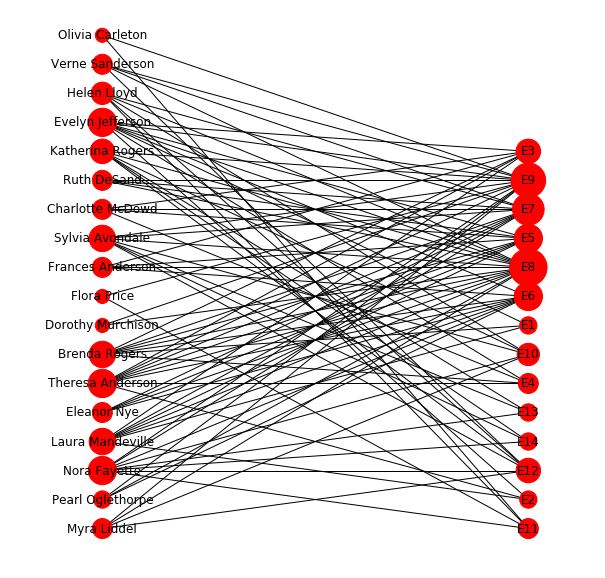

In [8]:

d = dict(G.degree())

#split the nodes by group
women, clubs = nx.bipartite.sets(G)
pos = {}

#manually set position to line them up in cols
pos.update((node, (1, index)) for index, node in enumerate(women))
pos.update((node, (2, index)) for index, node in enumerate(clubs))

#add diff color per bipartite group

#plot
plt.figure(figsize=(10,10)) 
plt.margins(x=0.15)
nx.draw(G,pos=pos, 
        nodelist=d.keys(), 
        node_size=[v * 100 for v in d.values()],
        with_labels=True)
       
    
plt.show()

In the above graph we have the women on the left and the clubs on the right - the size of the nodes provides an indication of weight.  We can see here that, as previously mentioned, E7, E8 and E9 appears to be the most important events and that there are a handful of women who appear to attend many events and some women who appear to attend few.

Following codes were taken from the book (chapter 5) to render the edges based on edge-weights (i.e. number of connections between women based on common clubs) of the network of women:

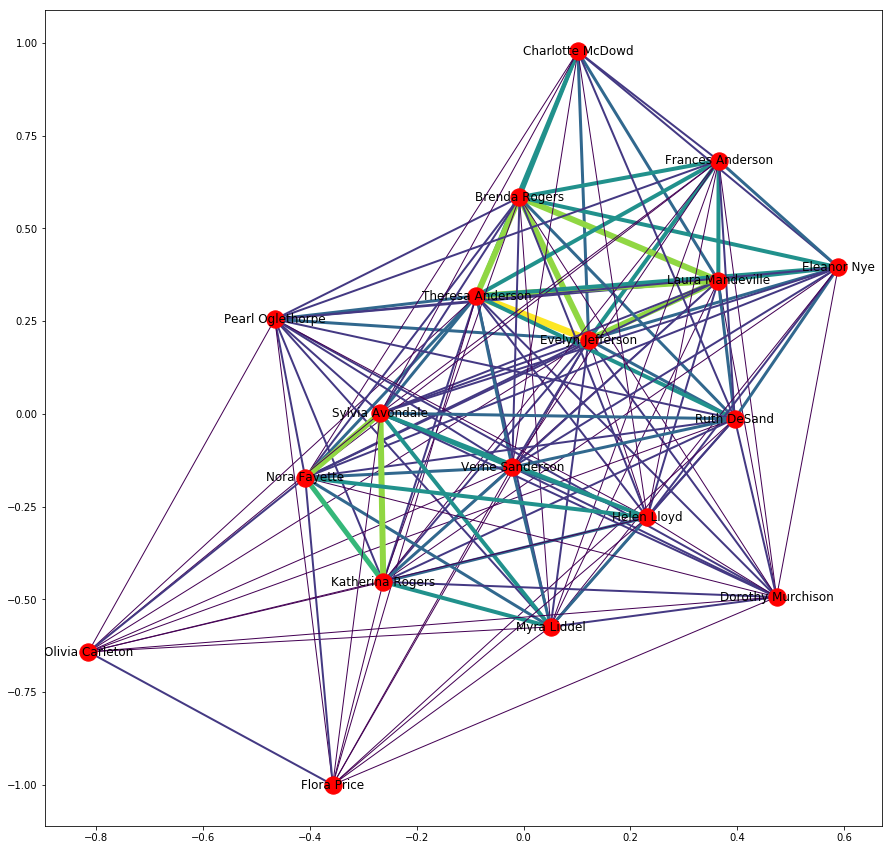

In [9]:
weights=[edata['weight'] for f,t,edata in W.edges(data=True)]
plt.figure(figsize=(15,15))
nx.draw_networkx(W,width=weights, edge_color=weights)
plt.show()

Following codes create the graph that is rendered based on edge-weights (i.e. number of connections between clubs based on common members ) of the network of clubs:

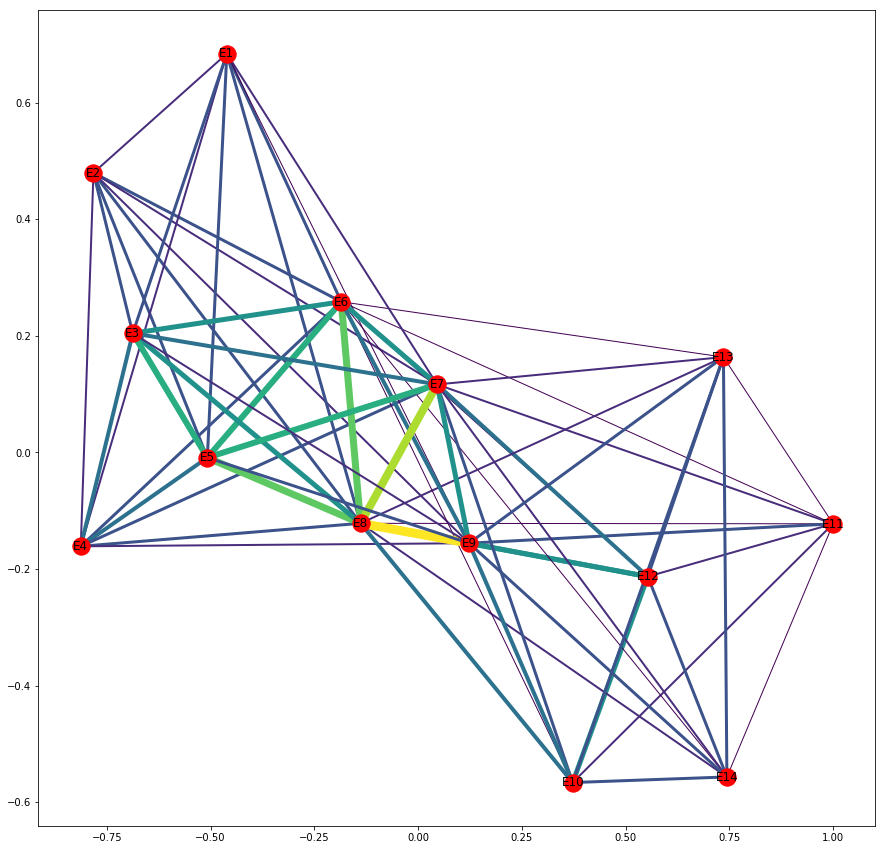

In [10]:
# project bipartite graph onto club nodes 
# the degree computed is weighted and counts the total number of shared members
C = bipartite.weighted_projected_graph(G, clubs, ratio=False)

weights=[edata['weight'] for f,t,edata in C.edges(data=True)]
plt.figure(figsize=(15,15))
nx.draw_networkx(C,width=weights, edge_color=weights)
plt.show()

Generally speaking, we see that there are a few women, and a few events that are much more significant than others.  In the case of the women, it appears as though there may be 2 close-knit groups, whereas all the more popular events/clubs appear to be well connected.